In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Import Data

In [2]:
data_url = "https://raw.githubusercontent.com/renatoquiliche/DataScience-PUCRio-FB/main/Data/DS_salarios/ds_salaries.csv"
data = pd.read_csv(data_url, index_col = 0)

### 1.Resampling Data, estimating variable mean and value frequency via bootsrapping

##### Bootstrapping function

In [3]:
def mean_bootstrap(series, B = 10000):
    return pd.Series([series.sample(n = len(series), replace = True).mean() for i in range(B)])

def frequency_bootstrap(series, value, B = 10000):
    
    T = pd.Series(data = 0, index = range(B))

    for i in range(B):
        
        sample = series.sample(n = len(series), replace = True)
        T_i = len(sample[sample == value])/len(series)
        T.loc[i] = T_i

    return T

##### Mean Estimation

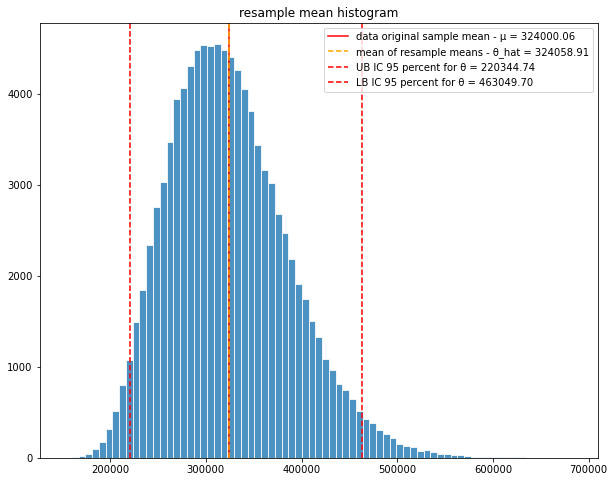

In [4]:
frequency = mean_bootstrap(data.salary,100000)

fig,ax = plt.subplots(figsize = (10,8))


ax.set_title('resample mean histogram')
ax.axvline(data.salary.mean(), color = 'red', label = 'data original sample mean - µ = %.2f'%data.salary.mean())
ax.axvline(frequency.mean(), label = 'mean of resample means - θ_hat = %.2f'%frequency.mean(), color = 'orange',linestyle = 'dashed')
ax.axvline(frequency.quantile(q=0.025),label = 'UB IC 95 percent for θ = %.2f'%frequency.quantile(q=0.025), color = 'red', linestyle = 'dashed')
ax.axvline(frequency.quantile(q=0.975), label = 'LB IC 95 percent for θ = %.2f'%frequency.quantile(q=0.975), color = 'red', linestyle = 'dashed')
ax.hist(frequency, bins = 75, edgecolor = 'white', alpha = 0.8)
ax.legend()

plt.show()

##### Frequency Estimation

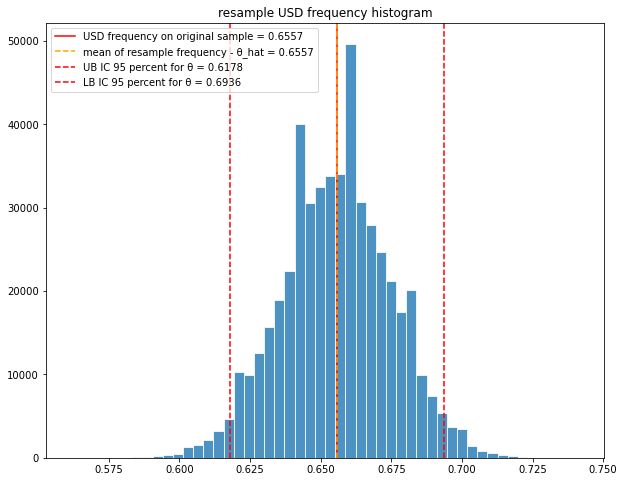

In [5]:
value = 'USD'
frequency = frequency_bootstrap(data.salary_currency, value, 500000)
frq_original_sample = len(data[data.salary_currency == value]) / len(data)

fig,ax = plt.subplots(figsize = (10,8))

ax.set_title('resample %s frequency histogram'%value)
ax.hist(frequency, bins = 50, edgecolor = 'white', alpha = 0.8)
ax.axvline(frq_original_sample, color = 'red', label = '%s frequency on original sample = %.4f'%(value, frq_original_sample))
ax.axvline(frequency.mean(), label = 'mean of resample frequency - θ_hat = %.4f'%frequency.mean(), color = 'orange',linestyle = 'dashed')
ax.axvline(frequency.quantile(q=0.025),label = 'UB IC 95 percent for θ = %.4f'%frequency.quantile(q=0.025), color = 'red', linestyle = 'dashed')
ax.axvline(frequency.quantile(q=0.975), label = 'LB IC 95 percent for θ = %.4f'%frequency.quantile(q=0.975), color = 'red', linestyle = 'dashed')
ax.legend()

plt.show()

### 2. Quantile Discretization

In [6]:
data['salary_discretized'] = pd.qcut(data.salary,10)
data[['salary','salary_discretized']]

,salary,salary_discretized
0,70000,"(60000.0, 80000.0]"
1,260000,"(237000.0, 30400000.0]"
2,85000,"(80000.0, 99020.0]"
3,20000,"(3999.999, 42720.0]"
4,150000,"(133928.0, 152600.0]"
...,...,...
602,154000,"(152600.0, 180000.0]"
603,126000,"(115000.0, 133928.0]"
604,129000,"(115000.0, 133928.0]"
605,150000,"(133928.0, 152600.0]"


### 3. Feature Engineering

In [7]:
data['working_days_count'] = pd.to_datetime("2022-12-31") - pd.to_datetime(data.work_year.map(str) + '-' + data.work_month.map(str)) #suppose today is 2022/12/31
data['remote_work_days_count'] = data.remote_ratio/100 * data['working_days_count'] * 8/24 * 20/30 #suppose 8 hours of work a day, 20 days of work each month
data[['work_year', 'work_month', 'remote_ratio', 'working_days_count', 'remote_work_days_count']]

,work_year,work_month,remote_ratio,working_days_count,remote_work_days_count
0,2020,6,0,943 days,0 days 00:00:00
1,2020,11,0,790 days,0 days 00:00:00
2,2020,12,50,760 days,84 days 10:40:00
3,2020,6,0,943 days,0 days 00:00:00
4,2020,10,50,821 days,91 days 05:20:00
...,...,...,...,...,...
602,2022,5,100,244 days,54 days 05:20:00
603,2022,6,100,213 days,47 days 08:00:00
604,2022,11,0,60 days,0 days 00:00:00
605,2022,2,100,333 days,74 days 00:00:00
